In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading Train data
#I am using google colb
#To load dataset you need to uload the datasets in google colab's sample folder
#datasets will be removed from this foldeer after each runtime- so if you leave this program, every time for running the file you need to uplpoad the dataset
#file_path is the path location of google colb's sample folder
file_path = '/content/sample_data/fraudTrain.csv'
data_train = pd.read_csv(file_path, encoding= 'unicode_escape')
print(data_train.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [ ]:
#loading Test data
#I am using google colb
#To load dataset you need to uload the datasets in google colab's sample folder
#datasets will be removed from this foldeer after each runtime- so if you leave this program, every time for running the file you need to uplpoad the dataset
#file_path is the path location of google colb's sample folder
file_path_t = '/content/sample_data/fraudTest.csv'
data_test = pd.read_csv(file_path_t, encoding= 'unicode_escape')
print(data_test.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [ ]:
#Exploring data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
#Exploring data
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

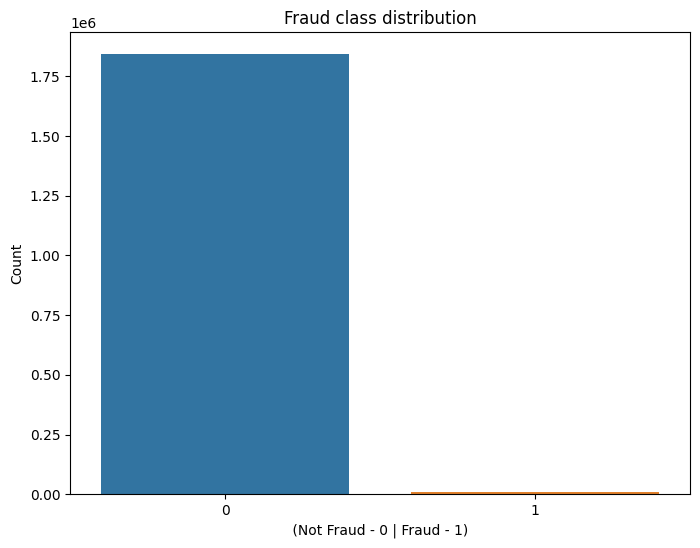

In [ ]:
#Exploratory analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=pd.concat([data_train, data_test], ignore_index=True))
plt.title('Fraud class distribution')
plt.xlabel(' (Not Fraud - 0 | Fraud - 1) ')
plt.ylabel('Count')
plt.show()

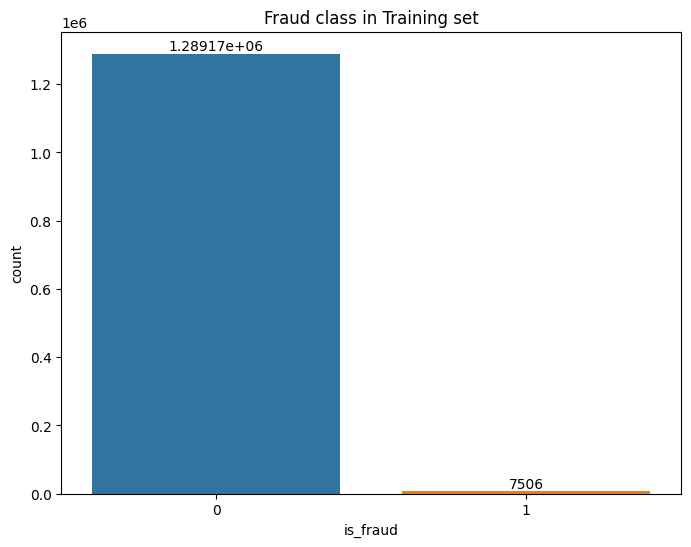

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Fraud class in Training set')
ax = sns.countplot(x='is_fraud',data=data_train)
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
print('Not Frauds:', round(data_train['is_fraud'].value_counts()[0]/len(data_train) * 100,2), '% of the Training dataset')
print('Frauds:', round(data_train['is_fraud'].value_counts()[1]/len(data_train) * 100,2), '% of the Training dataset')

Not Frauds: 99.42 % of the Training dataset
Frauds: 0.58 % of the Training dataset


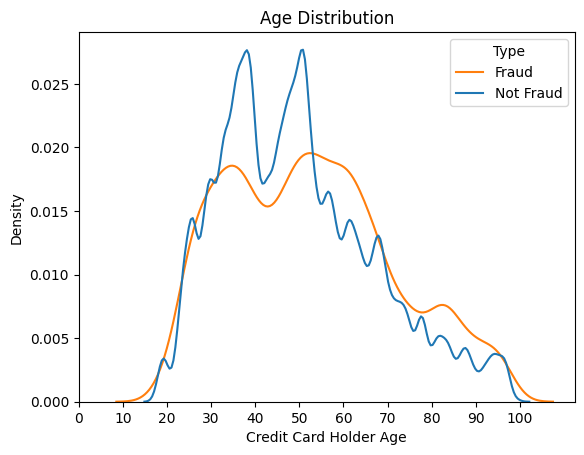

In [ ]:
data_train['age'] = dt.date.today().year-pd.to_datetime(data_train['dob']).dt.year
ax = sns.kdeplot(x='age', data=data_train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

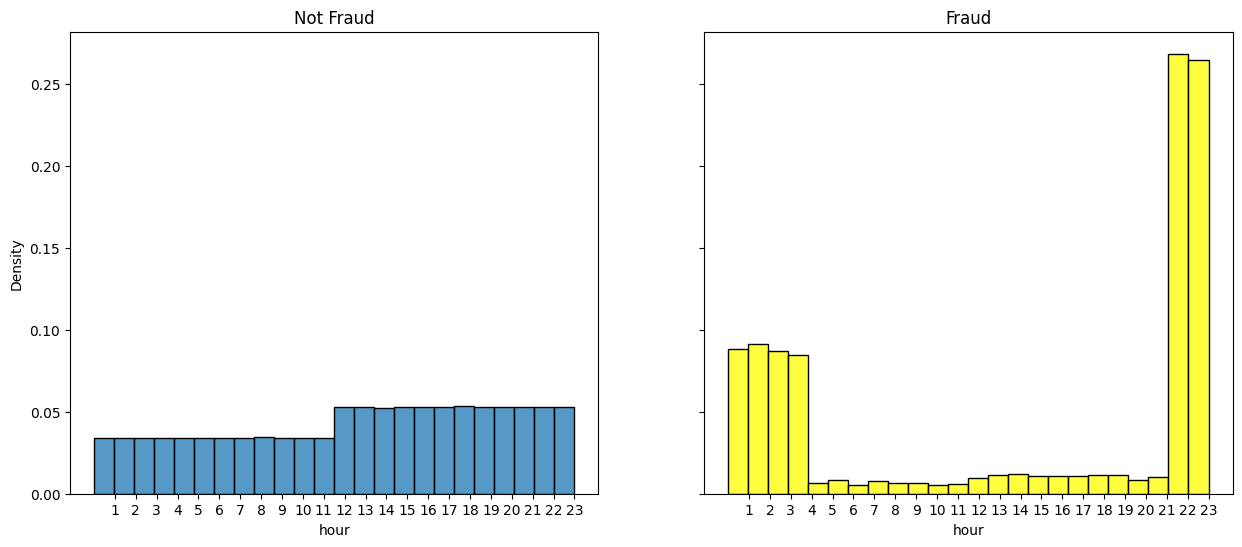

In [ ]:
data_train['hour'] = pd.to_datetime(data_train['trans_date_trans_time']).dt.hour
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='hour', data=data_train[data_train["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)
ax2 = sns.histplot(x='hour', data=data_train[data_train["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="yellow")
ax1.set_title("Not Fraud")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

In [ ]:
#data cleaning
data_train.isnull().sum(),data_test.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 age                      0
 hour                     0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city

In [ ]:
#Drop Columns that are not relevant for fraud prediction
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
data_train.drop(columns=drop_columns,inplace=True)
data_test.drop(columns=drop_columns,inplace=True)


Data pre_processing

In [ ]:
#Handling date_time
data_train['trans_date_trans_time']=pd.to_datetime(data_train['trans_date_trans_time'])
data_train['trans_date']=data_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
data_train['trans_date']=pd.to_datetime(data_train['trans_date'])
data_train['dob']=pd.to_datetime(data_train['dob'])

data_test['trans_date_trans_time']=pd.to_datetime(data_test['trans_date_trans_time'])
data_test['trans_date']=data_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
data_test['trans_date']=pd.to_datetime(data_test['trans_date'])
data_test['dob']=pd.to_datetime(data_test['dob'])

In [ ]:
#Feature Engineering
# Get Transaction Month & Year
data_train['trans_month'] = pd.DatetimeIndex(data_train['trans_date']).month
data_train['trans_year'] = pd.DatetimeIndex(data_train['trans_date']).year

In [ ]:
#Calculate distance between merchant and home location
data_train['latitudinal_distance'] = abs(round(data_train['merch_lat']-data_train['lat'],3))
data_train['longitudinal_distance'] = abs(round(data_train['merch_long']-data_train['long'],3))

data_test['latitudinal_distance'] = abs(round(data_test['merch_lat']-data_test['lat'],3))
data_test['longitudinal_distance'] = abs(round(data_test['merch_long']-data_test['long'],3))

In [ ]:
#Calculate Age
data_train["age"] = data_train["trans_date"]-data_train["dob"]
data_train["age"]=data_train["age"].astype('timedelta64[Y]')

data_test["age"] = data_test["trans_date"]-data_test["dob"]
data_test["age"]=data_test["age"].astype('timedelta64[Y]')

In [ ]:
#Drop Columns that are not relevant for fraud prediction
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
data_train.drop(columns=drop_columns,inplace=True)
data_test.drop(columns=drop_columns,inplace=True)

In [ ]:
#Handle data imbalance
# Convert categorical column gender into numerical

data_train.gender=data_train.gender.apply(lambda x: 1 if x=="M" else 0)
data_test.gender=data_test.gender.apply(lambda x: 1 if x=="M" else 0)

In [ ]:
print(data_train.columns)
data_train['category'] = data_train['category'].astype('category')
data_test['category'] = data_test['category'].astype('category')

Index(['category', 'amt', 'gender', 'city_pop', 'is_fraud', 'age', 'hour',
       'trans_month', 'trans_year', 'latitudinal_distance',
       'longitudinal_distance'],
      dtype='object')


In [ ]:
#Handle data imbalance
#Encoding of Category column
data_train = pd.get_dummies(data_train, columns=['category'], prefix='category')
data_test = pd.get_dummies(data_test, columns=['category'], prefix='category')

data_test = data_test.reindex(columns=data_train.columns, fill_value=0)

In [ ]:
data_train.head()

,amt,gender,city_pop,is_fraud,age,hour,trans_month,trans_year,latitudinal_distance,longitudinal_distance,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,0,1,2019,0.068,0.870,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,0,1,2019,0.271,0.024,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,0,1,2019,0.970,0.108,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,0,1,2019,0.804,0.447,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,0,1,2019,0.254,0.830,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data_test.head(2)

,amt,gender,city_pop,is_fraud,age,hour,trans_month,trans_year,latitudinal_distance,longitudinal_distance,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.0,0,0,0,0.02,0.265,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30.0,0,0,0,0.87,0.476,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Split Train and Test Data set
X_train = data_train.drop('is_fraud', axis=1)
y_train = data_train['is_fraud']
X_test = data_test.drop('is_fraud', axis=1)
y_test = data_test['is_fraud']

In [ ]:
#standardize data

from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Model Training

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Decision Tree classifier on the training data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtc.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.06      0.47      0.10      2145

    accuracy                           0.97    555719
   macro avg       0.53      0.72      0.54    555719
weighted avg       0.99      0.97      0.98    555719



In [ ]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.45      0.45      0.45      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.72      0.72    555719
weighted avg       1.00      1.00      1.00    555719

